In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
xsmb = pd.read_csv("XSMB.csv")
xsmb

,KQ
0,62651
1,5509
2,3764
3,48942
4,60899
...,...
7495,32582
7496,41387
7497,87705
7498,74425


In [3]:
xsmb["odd"] = xsmb['KQ'].apply(lambda x: 0 if x%2 == 0 else 1)
xsmb

,KQ,odd
0,62651,1
1,5509,1
2,3764,0
3,48942,0
4,60899,1
...,...,...
7495,32582,0
7496,41387,1
7497,87705,1
7498,74425,1


In [4]:
xsmb['odd'].value_counts()

odd
0    3781
1    3719
Name: count, dtype: int64

In [5]:
xsmb_odd = xsmb.groupby('odd').count().reset_index()

In [6]:
xsmb_odd

,odd,KQ
0,0,3781
1,1,3719


C:\Users\Admin\AppData\Local\Temp\ipykernel_3852\2601689005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xsmb_odd, x='odd', y='KQ', palette="viridis") #viridis: bảng màu có sẵn của seaborn


<Axes: xlabel='odd', ylabel='KQ'>

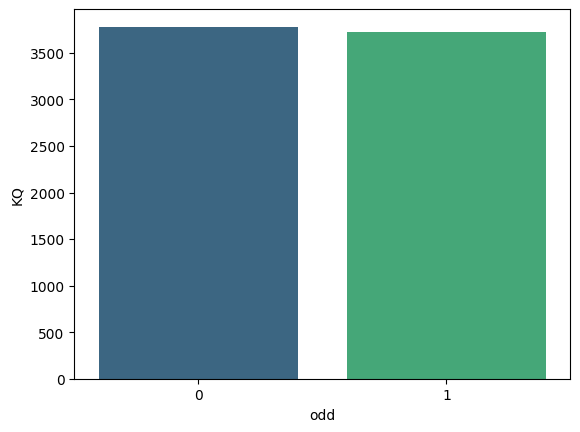

In [7]:
#ns.barplot(data=xsmb_odd, x='odd', y='KQ', palette=['blue', 'orange'])
sns.barplot(data=xsmb_odd, x='odd', y='KQ', palette="viridis") #viridis: bảng màu có sẵn của seaborn

In [8]:
xsmb['KQ'] = xsmb['KQ'].astype(str)
print(xsmb['KQ'].dtype)


object


In [9]:
#xsmb['last2digit'] = xsmb['KQ'].apply(lambda x: int(str(x)[-2:]))
xsmb['last2digit'] = xsmb['KQ'].apply(lambda x: str(str(x)[-2:]))

In [10]:
xsmb

,KQ,odd,last2digit
0,62651,1,51
1,5509,1,09
2,3764,0,64
3,48942,0,42
4,60899,1,99
...,...,...,...
7495,32582,0,82
7496,41387,1,87
7497,87705,1,05
7498,74425,1,25


In [11]:
print(xsmb['last2digit'].dtype)


object


In [12]:
xsmb['last2digit'].value_counts()

last2digit
36    98
65    98
70    95
24    93
82    92
      ..
69    60
20    60
40    53
28    49
2      1
Name: count, Length: 101, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_3852\2247255171.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_xsmb_df, x='last2digit', y = 'count', palette='viridis')


Text(0, 0.5, 'Số lần xuất hiện')

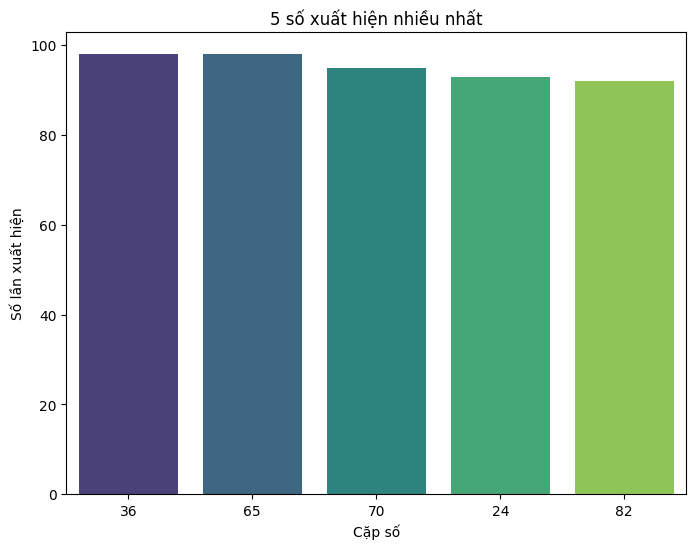

In [13]:
top5_xsmb = xsmb['last2digit'].value_counts().head(5)
top5_xsmb_df = top5_xsmb.reset_index()  
top5_xsmb_df.columns=['last2digit', 'count']

plt.figure(figsize=(8,6))
sns.barplot(data=top5_xsmb_df, x='last2digit', y = 'count', palette='viridis')

plt.title("5 số xuất hiện nhiều nhất")
plt.xlabel("Cặp số")
plt.ylabel("Số lần xuất hiện")

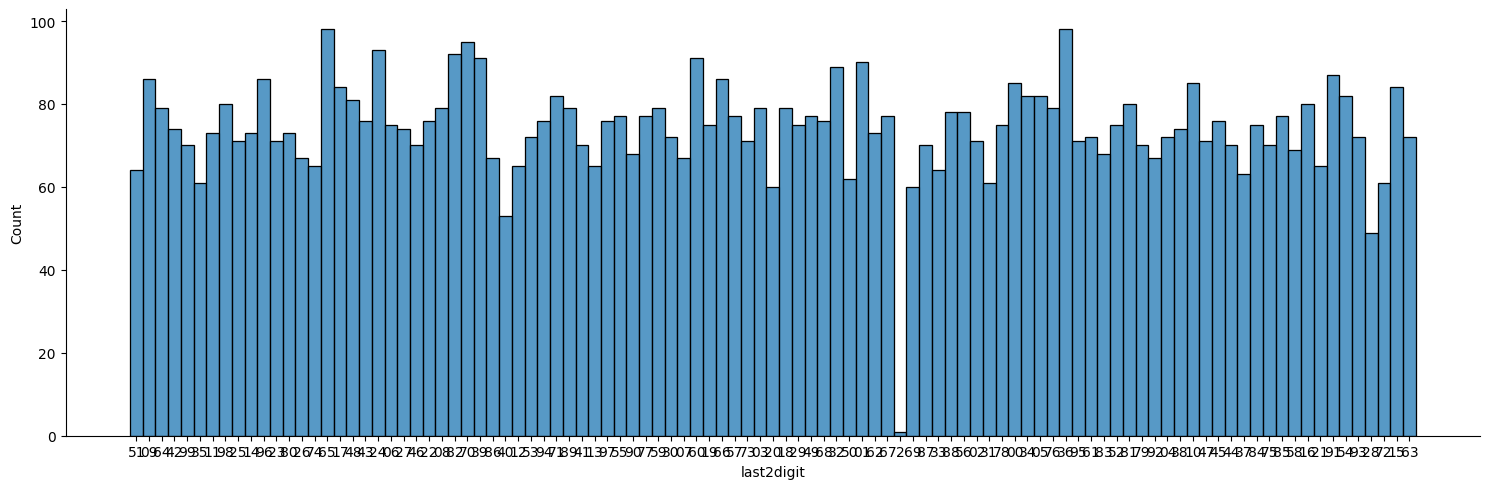

In [14]:
sns.displot(xsmb['last2digit'], bins=20, height=5, aspect=3)


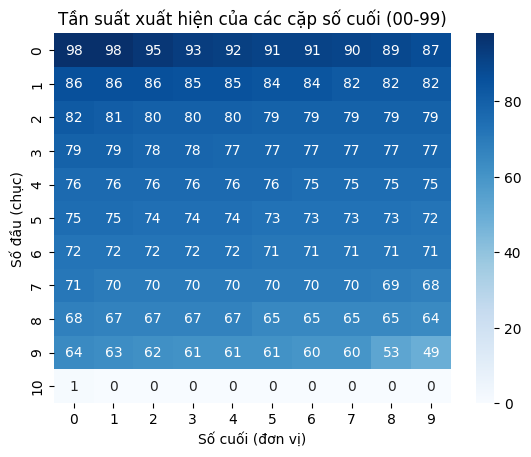

In [15]:
# Tạo bảng tần suất của các cặp số cuối
frequency_df = xsmb['last2digit'].value_counts().reset_index()
frequency_df.columns = ['last2digit', 'count']

# Chuyển đổi dữ liệu thành dạng phù hợp cho heatmap (pivot table)
heatmap_data = frequency_df.pivot_table(values='count', index=frequency_df.index // 10, columns=frequency_df.index % 10, fill_value=0)

# Vẽ biểu đồ heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True)
plt.title('Tần suất xuất hiện của các cặp số cuối (00-99)')
plt.xlabel('Số cuối (đơn vị)')
plt.ylabel('Số đầu (chục)')
plt.show()
